In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
classes = { 1:'Tốc độ tối đa (20km/h)',
            2:'Tốc độ tối đa (30km/h)', 
            3:'Tốc độ tối đa (50km/h)', 
            4:'Tốc độ tối đa (60km/h)', 
            5:'Tốc độ tối đa (70km/h)', 
            6:'Tốc độ tối đa (80km/h)', 
            7:'Hết giới hạn tốc độ (80km/h)', 
            8:'Tốc độ tối đa (100km/h)', 
            9:'Tốc độ tối đa (120km/h)', 
            10:'Cấm vượt', 
            11:'Không vượt quá 3,5 tấn', 
            12:'Quyền ưu tiên tại giao lộ', 
            13:'Đường ưu tiên', 
            14:'Yield', 
            15:'Dừng', 
            16:'Cấm phương tiện', 
            17:'Cấm phương tiện >3.5 tấn', 
            18:'Cấm vào', 
            19:'Chướng ngại vật', 
            20:'Đường cong nguy hiểm bên trái', 
            21:'Đường cong nguy hiểm bên phải', 
            22:'Đường cong kép', 
            23:'Đường gập ghềnh', 
            24:'Đường trơn', 
            25:'Đường thu hẹp ở bên phải', 
            26:'Công trình đang thi công', 
            27:'Đèn tín hiệu', 
            28:'Đường đi bộ', 
            29:'Trẻ em băng qua', 
            30:'Xe đạp băng qua', 
            31:'Cẩn thận với băng, tuyết',
            32:'Động vật hoang dã băng qua', 
            33:'Kết thúc giớn hạn tốc độ', 
            34:'Rẽ phải phía trước', 
            35:'Rẽ trái phía trước', 
            36:'Chỉ được đi thẳng', 
            37:'Đi thẳng hoặc sang phải', 
            38:'Đi thẳng hoặc sang trái', 
            39:'Đi bên phải', 
            40:'Đi bên trái', 
            41:'Đi vòng xoay', 
            42:'Kết thúc cấm vượt', 
            43:'Kết thúc cấm vượt phương tiện > 3,5 tấn' }


In [4]:
meta_data = pd.read_csv('./data/Meta.csv')

In [5]:
meta_shape = meta_data.shape
no_classes = meta_shape[0]

In [6]:
import cv2
train_data=[]
train_labels=[]

side = 20
channels = 3


for c in range(no_classes) :
    path = "./data/Train/{0}/".format(c)
    files = os.listdir(path)
    for file in files:
        train_image = cv2.imread(path+file)
        image_resized = cv2.resize(train_image, (side, side), interpolation = cv2.INTER_AREA)
        train_data.append(np.array(image_resized))
        train_labels.append(c)

In [7]:
data = np.array(train_data)
data = data.reshape((data.shape[0], 20*20*3))
data_scaled = data.astype(float)/255
labels = np.array(train_labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')
model.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=1, weights='distance')

In [21]:
import joblib
joblib.dump(model, 'kNN_model')

['kNN_model']

In [22]:

y_pred = model.predict(X_val)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.94      0.94      0.94       496
           2       0.93      0.91      0.92       450
           3       0.87      0.88      0.87       280
           4       0.94      0.89      0.92       418
           5       0.85      0.90      0.87       364
           6       0.92      0.98      0.95        59
           7       0.84      0.95      0.89       278
           8       0.89      0.96      0.93       301
           9       0.96      0.96      0.96       268
          10       0.94      0.94      0.94       370
          11       0.94      0.90      0.92       236
          12       0.99      0.94      0.97       450
          13       0.99      0.98      0.98       452
          14       1.00      0.91      0.95       162
          15       0.95      0.93      0.94       120
          16       1.00      1.00      1.00        90
          17       1.00    

In [24]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred, y_val))

0.9359857179290997


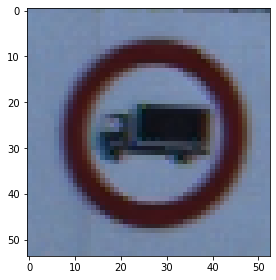

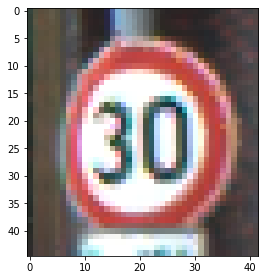

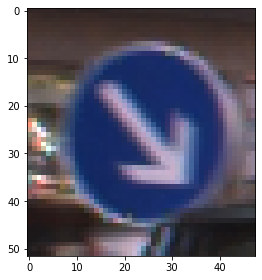

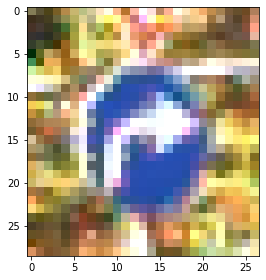

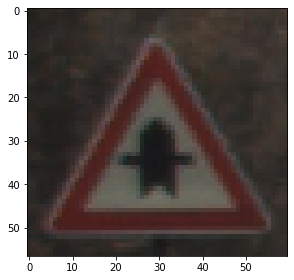

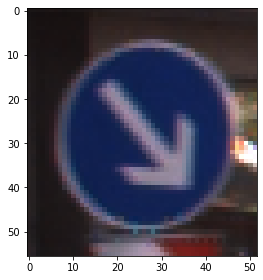

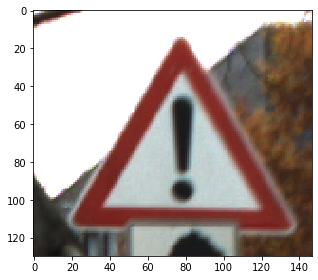

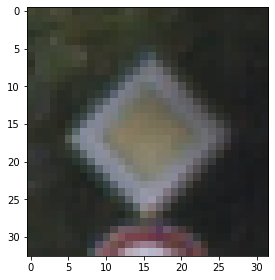

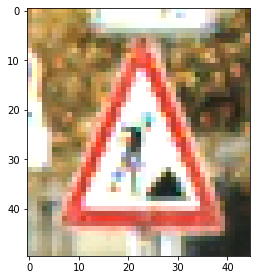

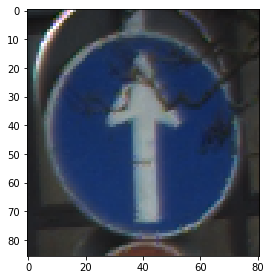

In [25]:
from pylab import *
from skimage import io
test_path = "./data/Test/"
test_files = os.listdir(test_path)
for i in range(10):
    img = io.imread(test_path+test_files[i])
    figure(i)
    io.imshow(img)

In [26]:
from PIL import Image
y_test=pd.read_csv("./data/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

print(y_test)

[16  1 38 ...  6  7 10]


In [27]:
for f in labels:
    image=cv2.imread('./data/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((20, 20))
    data.append(np.array(size_image))

In [28]:
X_test=np.array(data)
X_test = X_test.astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], 20*20*3))
pred = model.predict(X_test)

In [29]:
print(pred)
print(y_test)
print(metrics.accuracy_score(pred, y_test))

[16  4 38 ...  3  8 10]
[16  1 38 ...  6  7 10]
0.40190023752969123


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.20      0.32      0.25        60
           1       0.39      0.35      0.37       720
           2       0.28      0.25      0.27       750
           3       0.12      0.15      0.13       450
           4       0.29      0.34      0.31       660
           5       0.22      0.37      0.27       630
           6       0.51      0.32      0.39       150
           7       0.19      0.28      0.23       450
           8       0.26      0.31      0.28       450
           9       0.53      0.32      0.40       480
          10       0.56      0.65      0.60       660
          11       0.58      0.33      0.42       420
          12       0.73      0.58      0.65       690
          13       0.84      0.88      0.86       720
          14       0.91      0.40      0.55       270
          15       0.35      0.23      0.28       210
          16       0.58      0.79      0.67       150
          17       0.93    

original:  Đi bên phải  predicted:  Đi bên phải


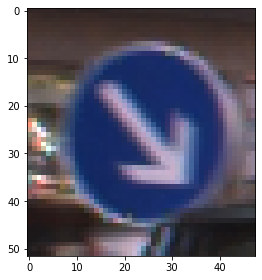

In [31]:
test_path = "./data/Test"
test_files = os.listdir(test_path)
# for i in range(15):
#     print('original: ', classes[y_test[i]], ' predicted: ', classes[pred[i]])
#     img = io.imread(test_path+'/'+test_files[i])
#     figure(i)
#     io.imshow(img)

i = randint(1, 12000)
i = 2
print('original: ', classes[y_test[i]+1], ' predicted: ', classes[pred[i]+1])
img = io.imread(test_path+'/'+test_files[i])
figure(i)
io.imshow(img)
